In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('../1lab/stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
train, test = train_test_split(df)

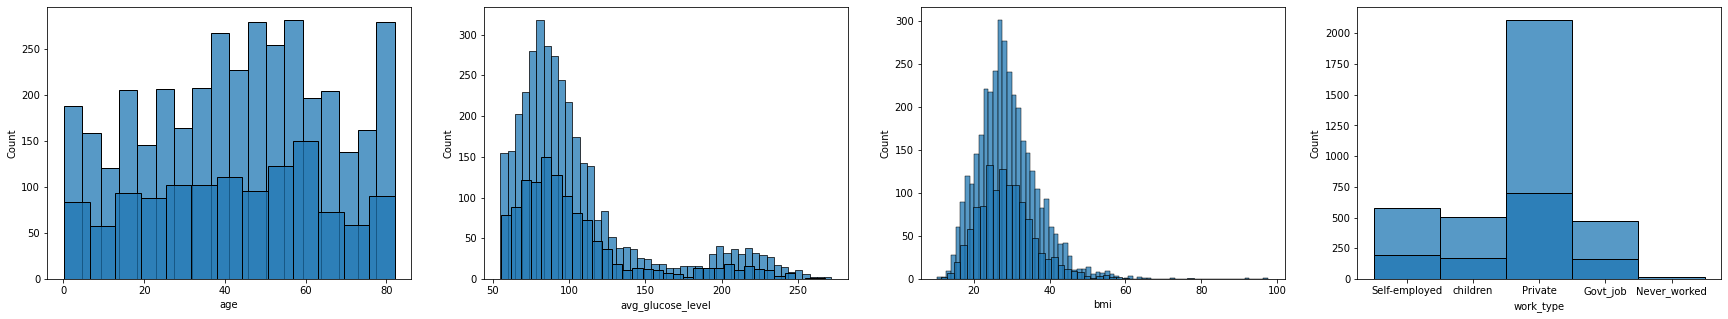

In [8]:
signs = ["age", "avg_glucose_level", "bmi", "work_type"]
plt.figure(figsize=(30,5))
for i, sign in enumerate(signs):
    plt.subplot(1, len(signs), i+1)
    sns.histplot(data=train, x=sign)
    sns.histplot(data=test, x=sign)
plt.show()

In [9]:
x_train = train[signs[:-1]].to_numpy()
y_train = train[signs[-1]].to_numpy()
x_test = test[signs[:-1]].to_numpy()
y_test = test[signs[-1]].to_numpy()

In [10]:
anames = ['KNeighborsClassifier',
          'RandomForestClassifier',
          'DecisionTreeClassifier']
clfs = [KNeighborsClassifier(n_neighbors=3),
        RandomForestClassifier(max_depth=3),
        DecisionTreeClassifier(max_depth=3)]

In [11]:
for i, clf in enumerate(clfs):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f'Algorithm: {anames[i]}')
    print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')
    print(f'Confusion matrix:{confusion_matrix(y_test, y_pred)}')

Algorithm: KNeighborsClassifier
Precision: 0.6026058631921825
Recall: 0.6026058631921825
Confusion matrix:[[ 31   0 114  15   0]
 [  0   0   0   0   2]
 [106   5 514  68  10]
 [ 33   0 123  37   1]
 [  0   3   8   0 158]]
Algorithm: RandomForestClassifier
Precision: 0.6986970684039088
Recall: 0.6986970684039088
Confusion matrix:[[  0   0 160   0   0]
 [  0   0   0   0   2]
 [  0   0 699   0   4]
 [  0   0 193   0   1]
 [  0   0  10   0 159]]
Algorithm: DecisionTreeClassifier
Precision: 0.6986970684039088
Recall: 0.6986970684039088
Confusion matrix:[[  0   0 160   0   0]
 [  0   0   1   0   1]
 [  0   1 697   0   5]
 [  0   1 192   0   1]
 [  0   1   7   0 161]]


In [12]:
params = [{'n_neighbors': list(range(2,7)), 'leaf_size': list(range(27, 33))},
          {'max_depth': list(range(1,6)), 'n_estimators': list(range(97,103))},
          {'max_depth': list(range(1,6))}]
clfs = [KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier()]
for i, clf in enumerate(clfs):
    clf = GridSearchCV(clf, params[i], cv=5)
    best = clf.fit(x_train, y_train)
    clfs[i] = best

In [13]:
for i, clf in enumerate(clfs):
    print(f'Algorithm: {anames[i]}')
    dictfilt = lambda a: dict((key, value) for key, value in a.items() if key in params[i])
    print(dictfilt(clf.best_estimator_.get_params()))
    y_pred = clf.best_estimator_.predict(x_test)
    print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')
    print(f'Confusion matrix:{confusion_matrix(y_test, y_pred)}')

Algorithm: KNeighborsClassifier
{'leaf_size': 27, 'n_neighbors': 6}
Precision: 0.6441368078175895
Recall: 0.6441368078175895
Confusion matrix:[[ 14   0 134  12   0]
 [  0   0   0   0   2]
 [ 58   3 592  42   8]
 [ 25   0 144  25   0]
 [  0   0   9   0 160]]
Algorithm: RandomForestClassifier
{'max_depth': 3, 'n_estimators': 101}
Precision: 0.6995114006514658
Recall: 0.6995114006514658
Confusion matrix:[[  0   0 160   0   0]
 [  0   0   0   0   2]
 [  0   0 699   0   4]
 [  0   0 193   0   1]
 [  0   0   9   0 160]]
Algorithm: DecisionTreeClassifier
{'max_depth': 1}
Precision: 0.6995114006514658
Recall: 0.6995114006514658
Confusion matrix:[[  0   0 160   0   0]
 [  0   0   1   0   1]
 [  0   0 697   0   6]
 [  0   0 192   0   2]
 [  0   0   7   0 162]]
